## 6.1.4 Generate Random Latitudes and Longitudes
    

In [17]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [18]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs


In [19]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [20]:
from citipy import citipy


In [21]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])
    

12.5417254970274 148.97927791611642
13.071026440330328 60.97244768094643
64.27662545212448 140.15424989006
-12.532741952516417 79.12664582762602
-89.19877643945185 -95.24484627402744
-76.64667493577835 2.795279022606252
48.27562997561935 -154.99470659542277
-48.95256768829159 104.27612936860265
-72.69721653833052 131.4090290819779
62.54222085835073 18.23359129208029
-48.32425862880259 19.02235225857524
71.40219807017843 -128.04807834468107
7.0618629944383855 -81.91224743002228
24.95831412609803 145.53719102993978
-1.8929503453295524 -125.20629338379413
66.55624234240005 170.81511056724605
-4.908998342560821 -83.57633197759498
-45.091001575388134 109.29958565473225
30.86244773800661 -124.9855500007331
-45.78232940899607 150.23204271646824
-21.487736113751453 174.34219856095712
17.119265727040897 -178.16254825122644
72.82894024460069 150.17458293905753
72.28774573064905 110.2258255909353
41.41857568559888 -110.6854211244365
75.8620255874853 10.869065009054992
-86.4626040620373 5.17639439

71.79988813148381 -169.6248292018429
1.6732965903292865 -56.367287698822736
-33.160175173575695 -113.58617683494712
-40.55756629862754 -107.19751091613223
55.4908493994879 -52.68542424070323
77.57435875175253 173.66264710035216
-16.959636787955972 -123.97262861875666
61.32318942822752 61.028908796327556
-56.23400943758579 -16.684719958589454
53.7751012057993 35.38928794197918
6.2463235441501865 -98.76632166974224
-38.56336226984981 -118.77898177459511
-33.93533902756134 179.96667883905542
14.14108160112741 69.450054872821
40.688293094494895 71.68957307300471
74.4193080834643 59.56853495409453
12.775592145944813 112.64947048980036
-83.50597587162991 -132.18585194058542
27.852294377534335 146.14049089325505
-57.65349062901298 -99.12755558025124
-60.859785330398665 167.6281844427246
41.88007738039019 104.2230469421545
87.03398385316211 -96.65396690827367
3.602108909353518 84.48781218772359
45.66276904377864 -6.448804475042294
8.22389366767392 164.93305421441443
30.806265342353754 96.14898

## 6.1.5 Generate Random World Cities


In [22]:
# Import citypy Module
from citipy import citipy


In [23]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


643

## 6.2.1 - 6.2.5

### See API_practice.ipynb

## 6.2.6 Get the City Weather Data

### Import Dependencies, and Initialize an Empty List and Counters

In [24]:
# Module work from here is in the WeatherPy.ipynb file

In [26]:
# Import the requests library
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Cll.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [25]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime


In [ ]:
### Loop Through the List of Cities and Build the City URL

In [27]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lorengau
Processing Record 2 of Set 1 | salalah
Processing Record 3 of Set 1 | ust-nera
Processing Record 4 of Set 1 | hithadhoo
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | hermanus
Processing Record 7 of Set 1 | kodiak
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | new norfolk
Processing Record 10 of Set 1 | harnosand
Processing Record 11 of Set 1 | bredasdorp
Processing Record 12 of Set 1 | tuktoyaktuk
Processing Record 13 of Set 1 | los algarrobos
Processing Record 14 of Set 1 | katsuura
Processing Record 15 of Set 1 | atuona
Processing Record 16 of Set 1 | pevek
Processing Record 17 of Set 1 | talara
Processing Record 18 of Set 1 | lompoc
Processing Record 19 of Set 1 | hobart
Processing Record 20 of Set 1 | isangel
Processing Record 21 of Set 1 | kapaa
Processing Record 22 of Set 1 | chokurdakh
Processing Record 23 of Set 1 | saskylakh


Processing Record 38 of Set 4 | beringovskiy
Processing Record 39 of Set 4 | mitsamiouli
Processing Record 40 of Set 4 | catamarca
Processing Record 41 of Set 4 | broome
Processing Record 42 of Set 4 | ponta do sol
Processing Record 43 of Set 4 | victoria
Processing Record 44 of Set 4 | mabaruma
Processing Record 45 of Set 4 | provideniya
Processing Record 46 of Set 4 | ucluelet
Processing Record 47 of Set 4 | princeton
Processing Record 48 of Set 4 | barrow
Processing Record 49 of Set 4 | olafsvik
Processing Record 50 of Set 4 | samusu
City not found. Skipping...
Processing Record 1 of Set 5 | pisco
Processing Record 2 of Set 5 | whitecourt
Processing Record 3 of Set 5 | saint-georges
Processing Record 4 of Set 5 | jalu
Processing Record 5 of Set 5 | grand river south east
City not found. Skipping...
Processing Record 6 of Set 5 | broken hill
Processing Record 7 of Set 5 | tomatlan
Processing Record 8 of Set 5 | vaitupu
City not found. Skipping...
Processing Record 9 of Set 5 | bojnur

Processing Record 28 of Set 8 | belgrade
Processing Record 29 of Set 8 | privolzhye
Processing Record 30 of Set 8 | middelburg
Processing Record 31 of Set 8 | carahue
Processing Record 32 of Set 8 | mariental
Processing Record 33 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 34 of Set 8 | aiani
Processing Record 35 of Set 8 | comodoro rivadavia
Processing Record 36 of Set 8 | bajah
Processing Record 37 of Set 8 | taltal
Processing Record 38 of Set 8 | vostok
Processing Record 39 of Set 8 | iquique
Processing Record 40 of Set 8 | dingle
Processing Record 41 of Set 8 | castro
Processing Record 42 of Set 8 | lolua
City not found. Skipping...
Processing Record 43 of Set 8 | kihei
Processing Record 44 of Set 8 | kindu
Processing Record 45 of Set 8 | maniitsoq
Processing Record 46 of Set 8 | casablanca
Processing Record 47 of Set 8 | port arthur
Processing Record 48 of Set 8 | santa cruz del sur
Processing Record 49 of Set 8 | abha
Processing Record 50 of Set 8 | mam

Processing Record 15 of Set 12 | cuauhtemoc
Processing Record 16 of Set 12 | kud
Processing Record 17 of Set 12 | sarkand
Processing Record 18 of Set 12 | carira
Processing Record 19 of Set 12 | gorontalo
Processing Record 20 of Set 12 | poli
Processing Record 21 of Set 12 | koran
Processing Record 22 of Set 12 | mustasaari
Processing Record 23 of Set 12 | chicama
Processing Record 24 of Set 12 | wenchi
Processing Record 25 of Set 12 | ust-ishim
Processing Record 26 of Set 12 | ossora
Processing Record 27 of Set 12 | niquelandia
Processing Record 28 of Set 12 | bristol
Processing Record 29 of Set 12 | sukhoverkovo
City not found. Skipping...
Processing Record 30 of Set 12 | mountain home
Processing Record 31 of Set 12 | whitehorse
Processing Record 32 of Set 12 | matamoros
Processing Record 33 of Set 12 | bud
Processing Record 34 of Set 12 | russell
Processing Record 35 of Set 12 | usakos
Processing Record 36 of Set 12 | waipawa
Processing Record 37 of Set 12 | calama
Processing Record

In [28]:
len(city_data)


595

## 6.2.7 Create a DataFrame of City Weather Data

In [29]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lorengau,-2.0226,147.2712,85.30,62,69,9.31,PG,2022-09-06 01:30:24
1,Salalah,17.0151,54.0924,76.91,94,100,5.41,OM,2022-09-06 01:30:25
2,Ust-Nera,64.5667,143.2000,54.32,36,98,6.02,RU,2022-09-06 01:30:26
3,Hithadhoo,-0.6000,73.0833,82.02,69,100,17.87,MV,2022-09-06 01:30:26
4,Punta Arenas,-53.1500,-70.9167,33.91,80,20,20.71,CL,2022-09-06 01:30:03
5,Hermanus,-34.4187,19.2345,50.81,80,15,8.03,ZA,2022-09-06 01:30:28
6,Kodiak,57.7900,-152.4072,60.31,67,100,3.44,US,2022-09-06 01:30:28
7,Busselton,-33.6500,115.3333,51.55,83,85,4.03,AU,2022-09-06 01:30:30
8,New Norfolk,-42.7826,147.0587,54.72,67,82,1.99,AU,2022-09-06 01:30:33
9,Harnosand,62.6323,17.9379,45.00,70,43,8.95,SE,2022-09-06 01:30:34


In [30]:
new_column_order = [
    "City", "Country", "Date", 
    "Lat", "Lng", "Max Temp", 
    "Humidity", "Cloudiness", "Wind Speed"
]

city_data_df = city_data_df[new_column_order]

city_data_df.head(10)


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lorengau,PG,2022-09-06 01:30:24,-2.0226,147.2712,85.30,62,69,9.31
1,Salalah,OM,2022-09-06 01:30:25,17.0151,54.0924,76.91,94,100,5.41
2,Ust-Nera,RU,2022-09-06 01:30:26,64.5667,143.2000,54.32,36,98,6.02
3,Hithadhoo,MV,2022-09-06 01:30:26,-0.6000,73.0833,82.02,69,100,17.87
4,Punta Arenas,CL,2022-09-06 01:30:03,-53.1500,-70.9167,33.91,80,20,20.71
5,Hermanus,ZA,2022-09-06 01:30:28,-34.4187,19.2345,50.81,80,15,8.03
6,Kodiak,US,2022-09-06 01:30:28,57.7900,-152.4072,60.31,67,100,3.44
7,Busselton,AU,2022-09-06 01:30:30,-33.6500,115.3333,51.55,83,85,4.03
8,New Norfolk,AU,2022-09-06 01:30:33,-42.7826,147.0587,54.72,67,82,1.99
9,Harnosand,SE,2022-09-06 01:30:34,62.6323,17.9379,45.00,70,43,8.95


In [31]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


## 6.3.1 Plot Latitude vs. Temperature
### Get Data for Plotting

In [32]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


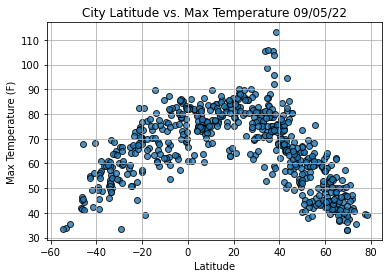

In [33]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


## 6.3.2 Plot Latitude vs. Humidity

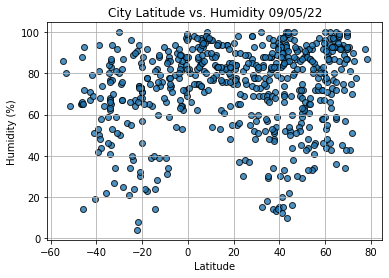

In [34]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()


## 6.3.3 Plot Latitude vs. Cloudiness

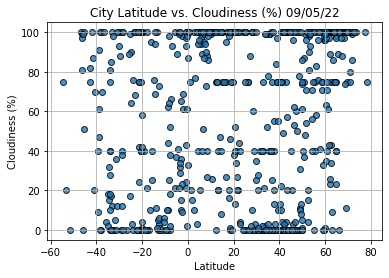

In [35]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()


## 6.3.4 Plot Latitude vs. Wind Speed

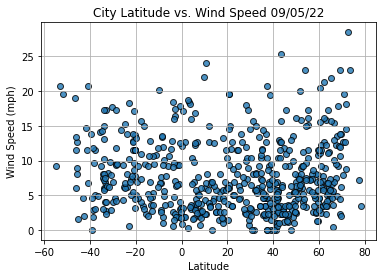

In [36]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()
